# Length

In [94]:
import os
import pandas
import numpy as np
import pandas as pd
import re
import ast
import json
from CS_feature_extractor import *
DATA_DIR = '../data'

# Experiment Config
DF_NAME = 'MathQA'

NUM_OF_SAMPLES = 500
NUM_OF_COT = 40
MODEL = 'gpt-3.5-turbo-0125'
storage_dir = os.path.join(DATA_DIR, f'Evaluation_CoTs/Algo_Design_Data')
hard_file_path = os.path.join(storage_dir, f'{DF_NAME}_hard.json')
easy_file_path = os.path.join(storage_dir, f'{DF_NAME}_easy.json')

In [95]:
with open(hard_file_path,'r') as f:
    data = json.load(f)
hard = pd.DataFrame(data)
hard

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW
0,0,c,"[54, c, 111, c, 111, a, b, a, d, 11, c, 112, 1...","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[12, 6, 4, 5, 6, 3, 0, 4, 6, 12, 6, 4, 6, 3, 4...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5518672199170125, 0.6051282051282052, ...","[0.0, 0.5495867768595042, 0.5443548387096775, ...","[0.0, 0.5518672199170125, 0.5955873583780561, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,c,"[a, a, a, a, a, c, a, a, a, a, a, a, a, a, a, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 5, 5, 5, 3, 5, 5, 6, 3, 4, 3, 8, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 5, 0, 0, 0, 5, 2, 0, 2, 0, 5, 9, 0, ...",Challenging Math,"[0.0, 0.6423357664233577, 0.5263157894736843, ...","[0.0, 0.6423357664233577, 0.5428571428571429, ...","[0.0, 0.6423357664233577, 0.5515014530190507, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,2,a,"[a, a, a, a, a, error, error, a, a, a, error, ...","[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 2, 2, 2, 2, 10, 10, 2, 2, 0, 10, 0, 0, 9, ...",Challenging Math,"[0.0, 0.943089430894309, 0.943089430894309, 0....","[0.0, 0.943089430894309, 0.967479674796748, 0....","[0.0, 0.943089430894309, 0.9715447154471545, 0...","[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, ..."
3,3,a,"[error, a, a, a, a, a) 50%, a, a, a, a, 100%, ...","[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 6, 5, 6, 5, 4, 3, 4, 4, 4, 7, 6, 3, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10, 2, 9, 2, 9, 9, 2, 0, 9, 2, 2, 0, 0, 5, 0,...",Challenging Math,"[0.0, 0.012422360248447228, 0.5151515151515151...","[0.0, 0.012345679012345734, 0.5276381909547738...","[0.0, 0.012422360248447228, 0.2717601547388781...","[0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, ...","[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, ..."
4,4,b,"[60, 36, 60, 60, 60, b, e, b) 60, 60, 60, e, 6...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[3, 6, 3, 3, 3, 3, 4, 3, 3, 3, 5, 5, 3, 3, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.5091575091575091, 0.49416342412451364,...","[0.0, 0.5072992700729927, 0.5226480836236933, ...","[0.0, 0.5091575091575091, 0.5772703913075399, ...","[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, ...","[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,d,"[1, d, d, d, 1, d, d, d, d, d, d, d, d, d, 1, ...","[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[5, 6, 1, 6, 7, 6, 5, 6, 6, 5, 6, 6, 7, 4, 6, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",Challenging Math,"[0.0, 0.8583690987124464, 0.31759656652360513,...","[0.0, 0.8583690987124464, 0.3157894736842105, ...","[0.0, 0.8583690987124464, 0.32119144565496494,...","[0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ..."
496,496,b,"[b, b, b, b, b, b, b, b, b, b, b, b, b, b, b, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 7, 5, 8, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0

In [96]:
with open(easy_file_path,'r') as f:
    data = json.load(f)
easy = pd.DataFrame(data)
easy

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW
0,0,c,"[c, c, c, c, c, c, c, c, c, c, c, c, c, c, c, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.9591836734693877, 0.9333333333333333, ...","[0.0, 0.9527027027027027, 0.9342105263157895, ...","[0.0, 0.9591836734693877, 0.9529680365296804, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,b,"[e, e, c, a, e, 5 / 9, c, d, c, c, e, 5 / 9, c...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 4, 3, 4, 3, 3, 3, 6, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.8916666666666666, 0.9285714285714286, ...","[0.0, 0.8916666666666666, 0.8455284552845528, ...","[0.0, 0.8916666666666666, 0.8857733175914995, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,c,"[c, a, c, c, c, d, c, c, c, c, c, c, 7, 6, c, ...","[1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...","[6, 6, 9, 6, 6, 4, 5, 6, 6, 7, 6, 6, 6, 6, 7, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.8622754491017964, 0.6601941747572815, ...","[0.0, 0.8571428571428572, 0.7061611374407584, ...","[0.0, 0.8622754491017964, 0.6989089685667595, ...","[0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, ...","[0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, ...","[0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, ..."
3,3,d,"[d, d, a, 1 / 18, b, b, b, b, b, d, b, 1 / 18,...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[4, 3, 4, 3, 6, 6, 3, 5, 5, 3, 3, 3, 7, 7, 7, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.6637554585152838, 0.7188940092165899, ...","[0.0, 0.6637554585152838, 0.6571428571428571, ...","[0.0, 0.6637554585152838, 0.6420557002604689, ...","[0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,a,"[a, b, a, d, b, a, b, cannot be determined, b,...","[1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, ...","[4, 6, 5, 3, 8, 3, 6, 3, 3, 3, 2, 3, 4, 6, 6, ...","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.5139442231075697, 0.5780590717299579, ...","[0.0, 0.5179282868525896, 0.6911196911196911, ...","[0.0, 0.5139442231075697, 0.6768800031546985, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, ...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,b,"[b, b, b, b, b, b, b, b, 17, b, 17, 17, b, b, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[4, 6, 5, 6, 9, 5, 6, 4, 8, 4, 8, 8, 8, 8, 8, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.6560509554140128, 0.7225806451612904, ...","[0.0, 0.6560509554140128, 0.7176470588235294, ...","[0.0, 0.6560509554140128, 0.7371292487551419, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, ..."
496,496,e,"[e, e, e, e, e, e, e, e, e, e, e, e, e, e, e, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4, 3, 4, 3, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.682352941176

In [97]:
feature_li = [
 'LEN',
 'QUA_IM',
 'DIF_IV',
 # 'DIF_SUB',
 'SIM_COT_BIGRAM',
 'SIM_COT_AGG',
 'SIM_COT_PW',
 'SIM_AC_BIGRAM',
 'SIM_AC_AGG',
 'SIM_AC_PW'
  ]

# Visualize

In [98]:
import pandas as pd

def concatenate_columns(df,data_columns, outcome_column):
    # Initialize an empty dictionary to store the concatenated data
    concatenated_data = {}
    
    # Get the number of rows based on the length of the outcome column
    num_rows = len(df)
    
    # Iterate over each column
    for column in data_columns+[outcome_column]:
        # Initialize an empty list to store the concatenated values for the current column
        concatenated_values = []
        
        # Iterate over each row
        for i in range(num_rows):
            # Get the list of values for the current column and row
            values = df[column][i]
            
            # Concatenate the values into a single string
            concatenated_values += list(values)
            
        
        # Add the concatenated values to the dictionary with the column name as the key
        concatenated_data[column] = concatenated_values
        print(len(concatenated_values))
    # Add the outcome column to the concatenated data dictionary
    
    # Create a DataFrame from the concatenated data dictionary
    hard_final = pd.DataFrame(concatenated_data)
    
    return hard_final

hard_final = concatenate_columns(hard,feature_li,'Correctness')
easy_final = concatenate_columns(easy,feature_li,'Correctness')

20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000


In [99]:
hard_final

,LEN,QUA_IM,DIF_IV,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,Correctness
0,12,0,0,0.000000,0.000000,0.000000,0,0,0,0
1,6,0,0,0.551867,0.549587,0.551867,0,0,0,1
2,4,0,0,0.605128,0.544355,0.595587,0,0,0,0
3,5,0,0,0.591954,0.527778,0.574372,0,0,0,1
4,6,0,0,0.480000,0.624506,0.630134,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
19995,7,0,0,0.860606,0.583333,0.821780,1,1,1,1
19996,6,0,0,0.917160,0.590580,0.815113,1,1,1,1
19997,6,0,0,0.775862,0.528986,0.772979,1,1,1,1
19998,6,0,0,0.837349,0.576087,0.830052,1,1,1,1


In [100]:
easy_final

,LEN,QUA_IM,DIF_IV,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,Correctness
0,4,0,0,0.000000,0.000000,0.000000,0,0,0,1
1,4,0,0,0.959184,0.952703,0.959184,1,1,0,1
2,4,0,0,0.933333,0.934211,0.952968,1,1,1,1
3,4,0,0,1.000000,0.953947,0.968645,1,1,1,1
4,4,0,0,0.973154,0.954545,0.956796,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,5,0,0,0.462366,0.577075,0.587640,0,0,0,0
19996,5,0,0,0.739394,0.517510,0.602346,0,1,1,1
19997,5,0,0,0.739394,0.583658,0.602887,0,0,0,0
19998,4,0,0,0.800000,0.466926,0.646547,0,1,1,1


In [101]:
from collections import Counter
print('--------------EASY--------------')
for col in easy_final.columns:
    if not col.startswith('SIM_COT_'):
        print(col, ':', Counter(easy_final[col]))
print('--------------HARD--------------')
for col in hard_final.columns:
    if not col.startswith('SIM_COT_'):
        print(col, ':', Counter(hard_final[col]))

--------------EASY--------------
LEN : Counter({4: 4370, 3: 3727, 5: 3678, 6: 2684, 7: 1709, 8: 1147, 2: 803, 9: 664, 10: 402, 1: 241, 0: 179, 11: 164, 12: 88, 13: 50, 14: 32, 15: 27, 16: 19, 17: 8, 19: 4, 18: 2, 95: 1, 20: 1})
QUA_IM : Counter({0: 19952, 1: 48})
DIF_IV : Counter({0: 18771, 2: 870, 5: 199, 9: 81, 10: 78, 1: 1})
SIM_AC_BIGRAM : Counter({1: 11087, 0: 8913})
SIM_AC_AGG : Counter({1: 12793, 0: 7207})
SIM_AC_PW : Counter({1: 10625, 0: 9375})
Correctness : Counter({1: 10045, 0: 9955})
--------------HARD--------------
LEN : Counter({4: 3727, 5: 3405, 3: 2970, 6: 2516, 7: 1752, 0: 1614, 8: 1241, 9: 735, 2: 713, 10: 489, 11: 249, 1: 224, 12: 163, 13: 72, 14: 56, 15: 25, 16: 21, 17: 10, 20: 5, 18: 4, 19: 3, 21: 2, 26: 1, 85: 1, 22: 1, 45: 1})
QUA_IM : Counter({0: 19936, 1: 64})
DIF_IV : Counter({0: 15951, 2: 2069, 10: 946, 5: 652, 9: 371, 1: 5, 11: 2, 3: 2, 6: 2})
SIM_AC_BIGRAM : Counter({0: 10536, 1: 9464})
SIM_AC_AGG : Counter({1: 11346, 0: 8654})
SIM_AC_PW : Counter({0: 11128

# Hard DF

Optimization terminated successfully.
         Current function value: 0.543521
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Correctness   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15990
Method:                           MLE   Df Model:                            9
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:                  0.2040
Time:                        16:46:26   Log-Likelihood:                -8696.3
converged:                       True   LL-Null:                       -10925.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5126      0.085     -6.014      0.000      -0.680      -0.346
LEN              

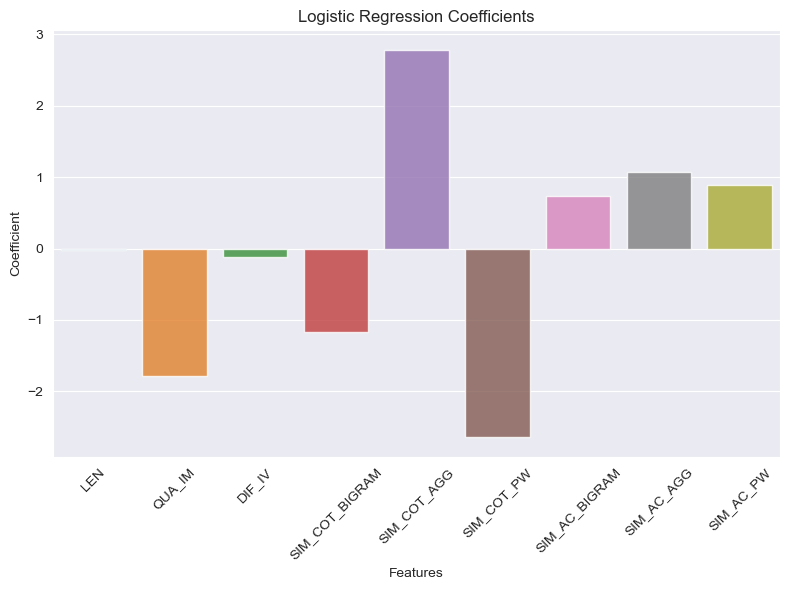

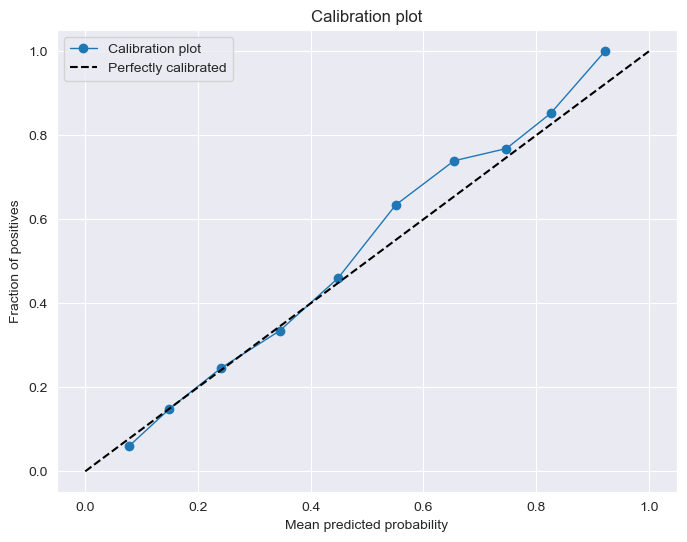

In [102]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss, precision_recall_curve, auc,roc_curve, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Separate the features (X) and the outcome variable (y)
X = hard_final[feature_li]
y = hard_final['Correctness']



# Calculate the split index
split_idx = int(len(hard_final) * 0.8)  # 80% of the length of the dataset

# Split the data into training and test sets
X_train = hard_final[feature_li].iloc[:split_idx]
y_train = hard_final['Correctness'].iloc[:split_idx]
X_test = hard_final[feature_li].iloc[split_idx:]
y_test = hard_final['Correctness'].iloc[split_idx:]

# Add a constant term to the features for the intercept for training and testing set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the model summary to see the coefficients and their significance
print(result.summary())

# Split the data into training and test sets
X_train = hard_final[feature_li].iloc[:split_idx]
y_train = hard_final['Correctness'].iloc[:split_idx]
X_test = hard_final[feature_li].iloc[split_idx:]
y_test = hard_final['Correctness'].iloc[split_idx:]

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")

# Visualize the coefficients and their significance using a bar plot
coef_df = pd.DataFrame({'Coefficient': model.coef_[0]}, index=X_train.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

The AUROC score is: 0.7925090058397605
The Brier score is: 0.18309884772615273
Log Loss is: 0.5691646020959854


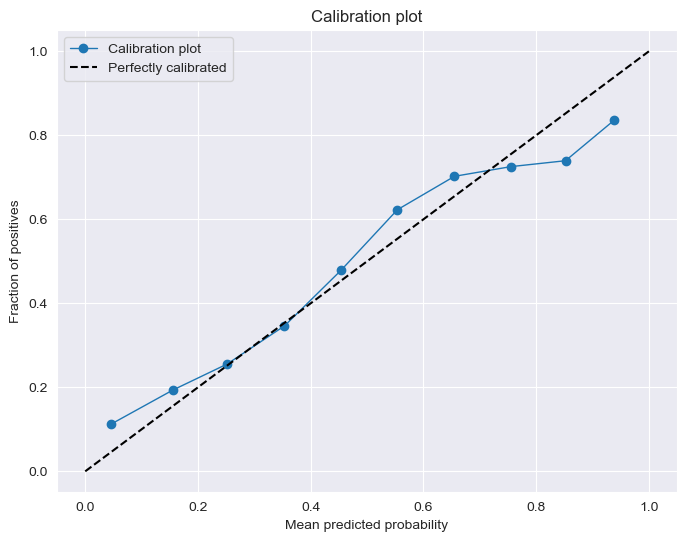

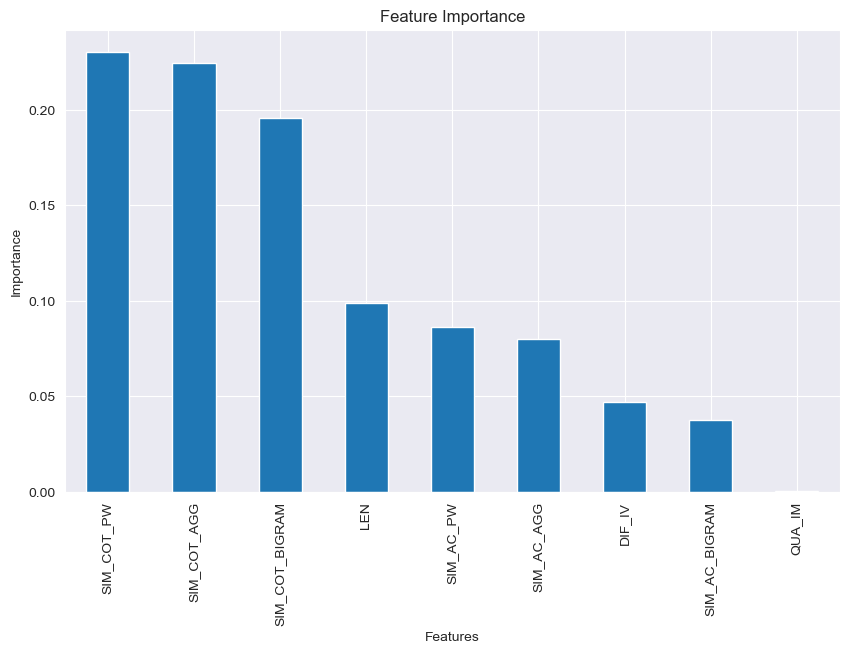

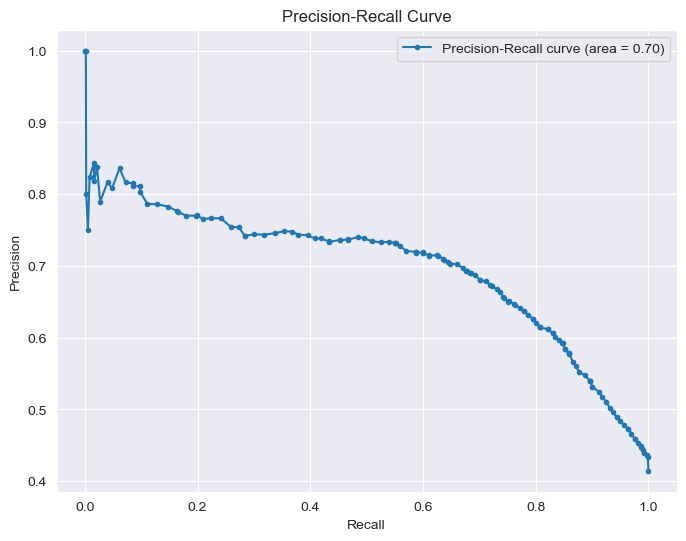

In [103]:
# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test, y_pred_proba)
brier = brier_score_loss(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore

AUROC Score: 0.8090499289731025
Best Threshold: 0.43990234864604
Confusion Matrix:
[[1876  466]
 [ 461 1197]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      2342
           1       0.72      0.72      0.72      1658

    accuracy                           0.77      4000
   macro avg       0.76      0.76      0.76      4000
weighted avg       0.77      0.77      0.77      4000


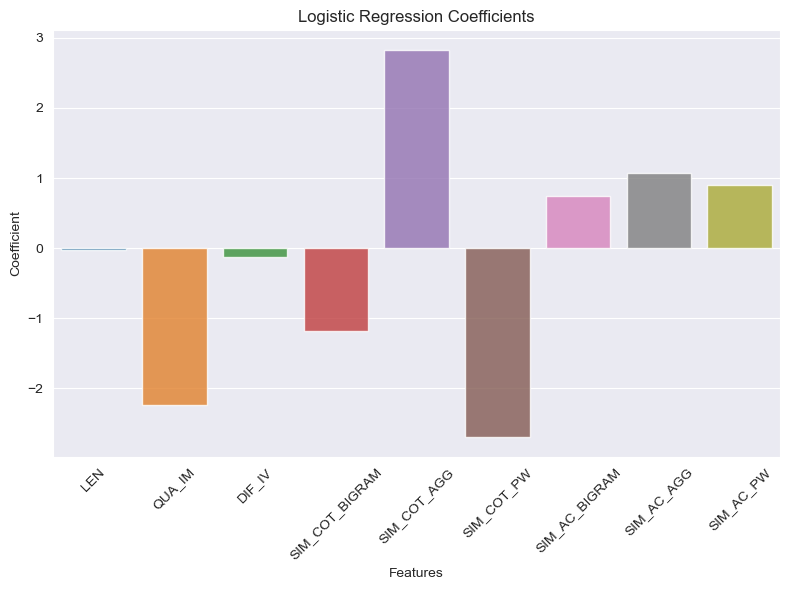

In [104]:
# Setting up the logistic regression model
log_reg = LogisticRegression()

# Using GridSearchCV to optimize hyperparameters
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Different solvers
    'penalty': ['l1', 'l2', 'none'],  # Regularization types
}

clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)

# Best model
model = clf.best_estimator_

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y_test, y_probs > thresh) for thresh in thresholds]
best_thresh = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {best_thresh}')

# Predict using the best threshold
y_pred = (y_probs >= best_thresh).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Easy

         Current function value: 0.587160
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            Correctness   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15990
Method:                           MLE   Df Model:                            9
Date:                Mon, 22 Apr 2024   Pseudo R-squ.:                  0.1524
Time:                        16:46:55   Log-Likelihood:                -9394.6
converged:                      False   LL-Null:                       -11084.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.5528      0.090     -6.174      0.000      -0.728      -0.377
LEN               -0.0558      0.008     -6.780      

W:\anaconda3\envs\llm_hall_project\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


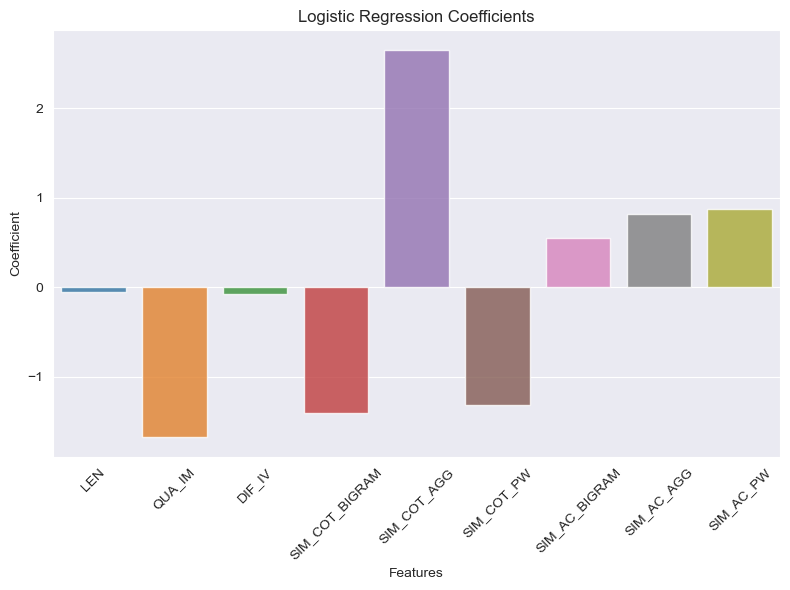

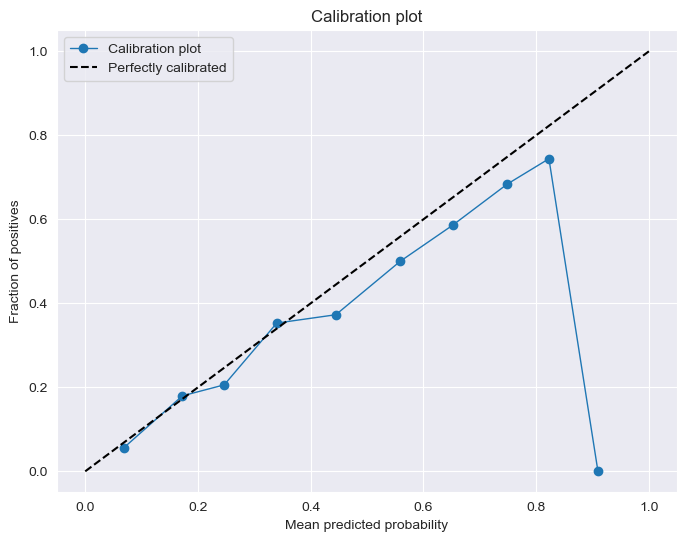

In [105]:
X = easy_final[feature_li]
y = easy_final['Correctness']



# Calculate the split index
split_idx = int(len(easy_final) * 0.8)  # 80% of the length of the dataset

# Split the data into training and test sets
X_train = easy_final[feature_li].iloc[:split_idx]
y_train = easy_final['Correctness'].iloc[:split_idx]
X_test = easy_final[feature_li].iloc[split_idx:]
y_test = easy_final['Correctness'].iloc[split_idx:]

# Add a constant term to the features for the intercept for training and testing set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the model summary to see the coefficients and their significance
print(result.summary())

# Split the data into training and test sets
X_train = easy_final[feature_li].iloc[:split_idx]
y_train = easy_final['Correctness'].iloc[:split_idx]
X_test = easy_final[feature_li].iloc[split_idx:]
y_test = easy_final['Correctness'].iloc[split_idx:]

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")

# Visualize the coefficients and their significance using a bar plot
coef_df = pd.DataFrame({'Coefficient': model.coef_[0]}, index=X_train.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

The AUROC score is: 0.7055834460058223
The Brier score is: 0.22749064248906223
Log Loss is: 0.7226912731779778


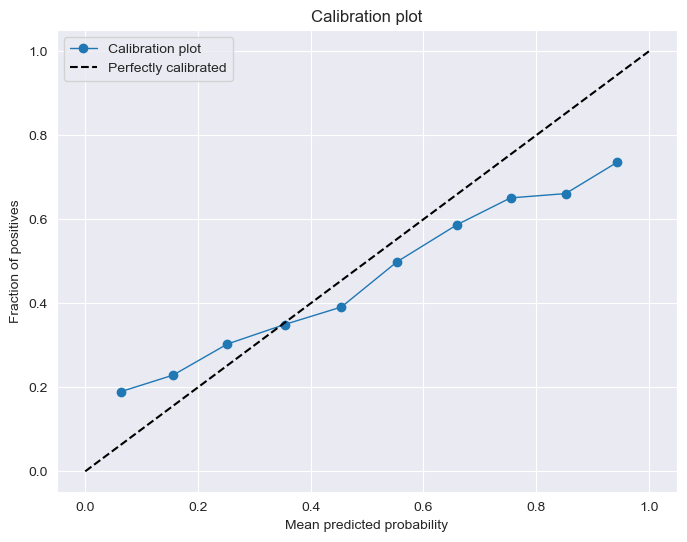

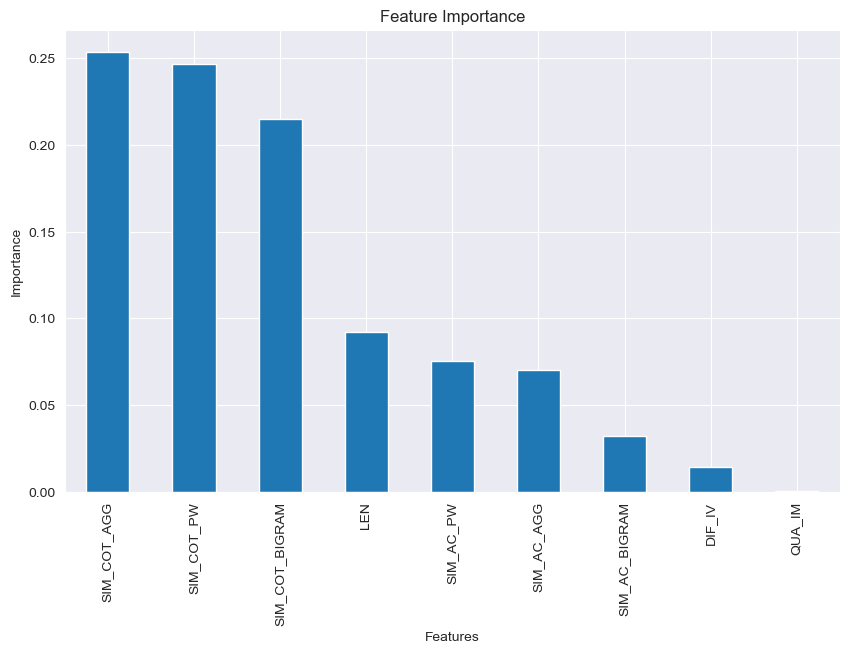

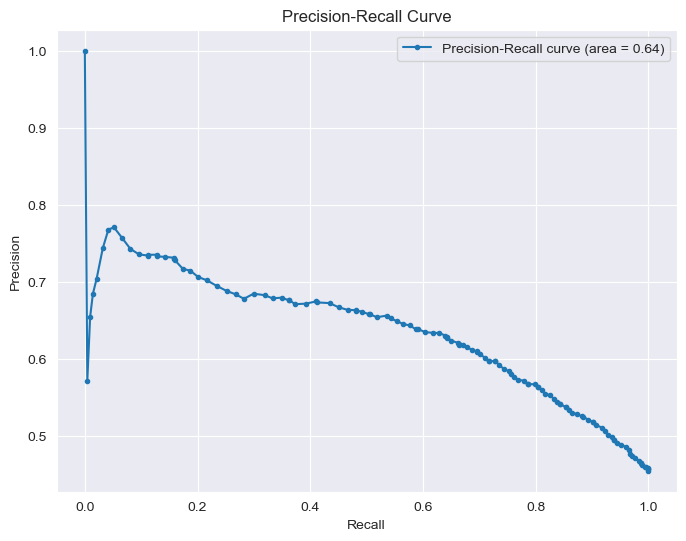

In [106]:
# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test, y_pred_proba)
brier = brier_score_loss(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore

AUROC Score: 0.7336382024403815
Best Threshold: 0.3176387341087767
Confusion Matrix:
[[1050 1133]
 [ 275 1542]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.48      0.60      2183
           1       0.58      0.85      0.69      1817

    accuracy                           0.65      4000
   macro avg       0.68      0.66      0.64      4000
weighted avg       0.69      0.65      0.64      4000


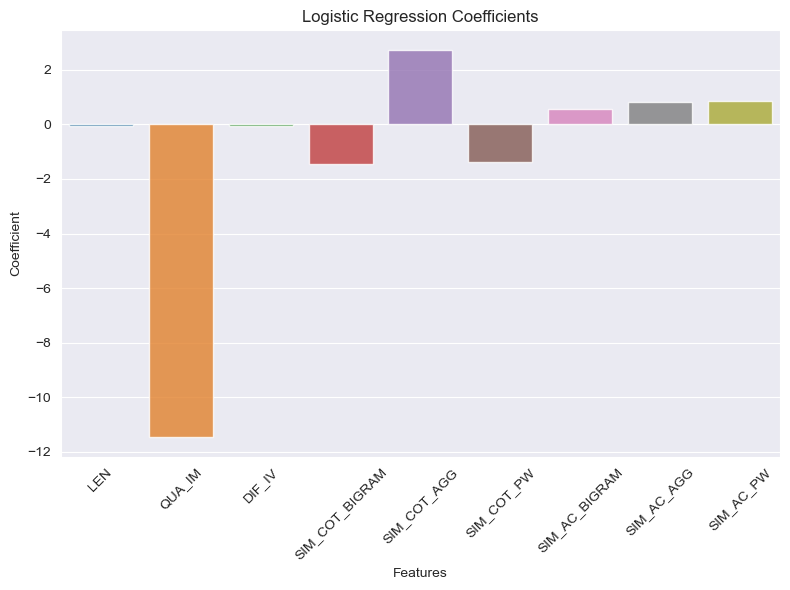

In [107]:
# Setting up the logistic regression model
log_reg = LogisticRegression()

# Using GridSearchCV to optimize hyperparameters
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Different solvers
    'penalty': ['l1', 'l2', 'none'],  # Regularization types
}

clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)

# Best model
model = clf.best_estimator_

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y_test, y_probs > thresh) for thresh in thresholds]
best_thresh = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {best_thresh}')

# Predict using the best threshold
y_pred = (y_probs >= best_thresh).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
